In [1]:
import numpy as np
import pandas as pd
from IO.build_ds import load_anno, load_label_dic, create_annotation

from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_root = "/home/tanida/workspace/Insect_Phenology_Detector/data"
img_folder = "refined_images"
train_anno_folders = ["annotations_0", "annotations_2", "annotations_3", "annotations_20200806"]

In [3]:
unused_labels = ["]"]
images, anno = load_anno(data_root, img_folder, train_anno_folders)
new_anno = create_annotation(images, anno, unused_labels, centering=False, percent=True)
label_dic = load_label_dic(new_anno, each_flag=True, plus_other=False, target_with_other=False)

loading path ...
loading images ...
loading annos ...


100%|██████████| 128/128 [00:00<00:00, 18198.40it/s]

{'Coleoptera': 0, 'Diptera': 1, 'Ephemeridae': 2, 'Ephemeroptera': 3, 'Hemiptera': 4, 'Hymenoptera': 5, 'Lepidoptera': 6, 'Megaloptera': 7, 'Plecoptera': 8, 'Trichoptera': 9, 'Unknown': 10, 'snail': 11, 'spider': 12}


In [4]:
def init_data_dic(label_dic, new_anno):
    data_dic = {}
    for k, v in label_dic.items():
        data_dic.update({k: []})

    for k, v in new_anno.items():
        if k == ".ipynb_checkpoints":
            continue
        for value in v:
            data_dic[value[0]].append([value[1][2] - value[1][0], value[1][3] - value[1][1]])
            
    for k, v in data_dic.items():
        data_dic[k] = np.array(data_dic[k])
    
    return data_dic

def preprocess_scatterPlot(X_data, use_PCA=False):
    data_index = range(0, len(X_data))
    
    n_components = 2
    whiten = False
    random_state = 2018

    pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)
    
    if use_PCA is True:
        X_data = pca.fit_transform(X_data)
    X_data = pd.DataFrame(data=X_data, index=data_index)
    return X_data, data_index

def get_dbscan_result(X_data, eps=0.005, min_samples=5):
    leaf_size = 30
    n_jobs = 1

    db = DBSCAN(eps=eps, min_samples=min_samples, leaf_size=leaf_size, n_jobs=n_jobs)
    
    X_data_dbscanClustered = db.fit_predict(X_data.loc[:, :])
    X_data_dbscanClustered = pd.DataFrame(data=X_data_dbscanClustered, index=X_data.index, columns=['cluster'])
    
    countByCluster = pd.DataFrame(data=X_data_dbscanClustered['cluster'].value_counts())
    countByCluster.reset_index(inplace=True, drop=False)
    countByCluster.columns = ['cluster','clusterCount']
    return countByCluster, X_data_dbscanClustered

def scatterPlot(X_data, data_index, y_data=None):
    tempDF = pd.DataFrame(data=X_data.loc[:, 0:1], index=X_data.index)
    if y_data is not None:
        tempDF = pd.concat((tempDF, y_data), axis=1, join="inner")
        tempDF.columns = ["First Vector", "Second Vector", "Label"]
        sns.lmplot(x="First Vector", y="Second Vector", hue="Label", data=tempDF, fit_reg=False)
    else:
        tempDF.columns = ["First Vector", "Second Vector"]
        sns.lmplot(x="First Vector", y="Second Vector", data=tempDF, fit_reg=False)
    axe = plt.gca()
    axe.set_title("Scatter Plot of Bounding Box")

In [5]:
data_dic = init_data_dic(label_dic, new_anno)

### Coleoptera

In [6]:
X_data = data_dic['Coleoptera']
X_data.shape

(40, 2)

,cluster,clusterCount
0,0,34
1,-1,6


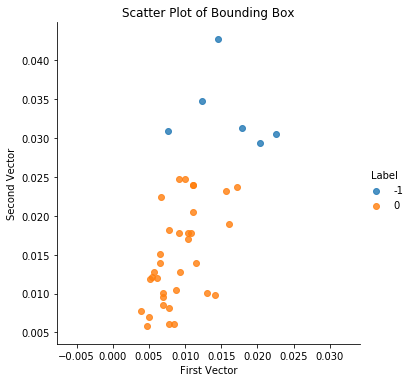

In [7]:
X_data, data_index = preprocess_scatterPlot(X_data)
countByCluster, X_data_dbscanClustered = get_dbscan_result(X_data)
scatterPlot(X_data, data_index, y_data=X_data_dbscanClustered["cluster"])
countByCluster

### Diptera

In [8]:
X_data = data_dic['Diptera']
X_data.shape

(450, 2)

,cluster,clusterCount
0,0,447
1,-1,3


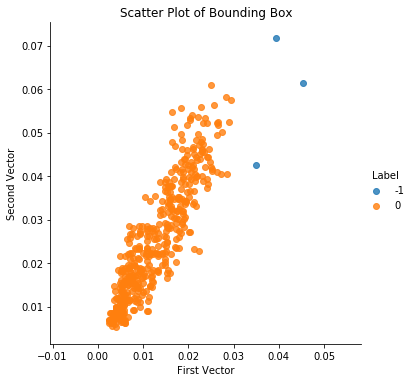

In [9]:
X_data, data_index = preprocess_scatterPlot(X_data)
countByCluster, X_data_dbscanClustered = get_dbscan_result(X_data)
scatterPlot(X_data, data_index, y_data=X_data_dbscanClustered["cluster"])
countByCluster

### Ephemeridae

In [10]:
X_data = np.array(data_dic['Ephemeridae'])
X_data.shape

(130, 2)

,cluster,clusterCount
0,0,114
1,-1,16


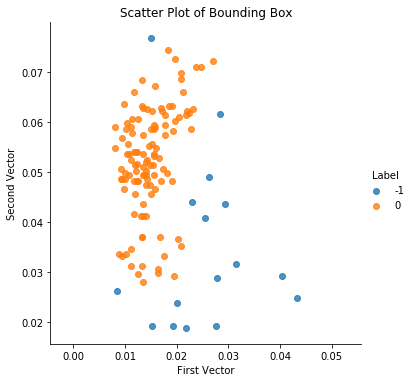

In [11]:
X_data, data_index = preprocess_scatterPlot(X_data)
countByCluster, X_data_dbscanClustered = get_dbscan_result(X_data)
scatterPlot(X_data, data_index, y_data=X_data_dbscanClustered["cluster"])
countByCluster

### Ephemeroptera

In [12]:
X_data = np.array(data_dic['Ephemeroptera'])
X_data.shape

(262, 2)

,cluster,clusterCount
0,0,253
1,-1,9


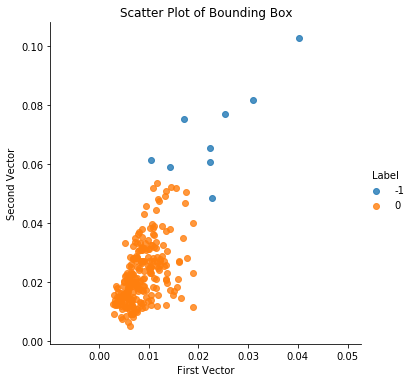

In [13]:
X_data, data_index = preprocess_scatterPlot(X_data)
countByCluster, X_data_dbscanClustered = get_dbscan_result(X_data)
scatterPlot(X_data, data_index, y_data=X_data_dbscanClustered["cluster"])
countByCluster

### Hemiptera

In [14]:
X_data = np.array(data_dic['Hemiptera'])
X_data.shape

(31, 2)

,cluster,clusterCount
0,0,21
1,1,7
2,-1,3


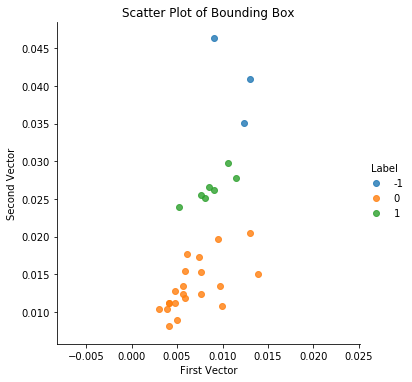

In [15]:
X_data, data_index = preprocess_scatterPlot(X_data)
countByCluster, X_data_dbscanClustered = get_dbscan_result(X_data)
scatterPlot(X_data, data_index, y_data=X_data_dbscanClustered["cluster"])
countByCluster

### Hymenoptera

In [16]:
X_data = np.array(data_dic['Hymenoptera'])
X_data.shape

(7, 2)

,cluster,clusterCount
0,-1,7


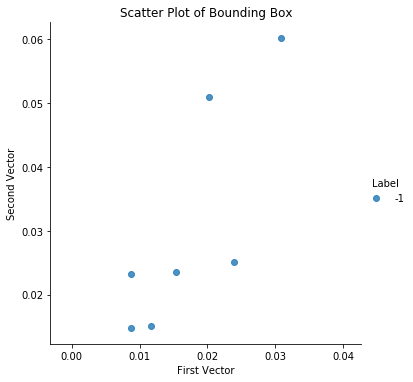

In [17]:
X_data, data_index = preprocess_scatterPlot(X_data)
countByCluster, X_data_dbscanClustered = get_dbscan_result(X_data)
scatterPlot(X_data, data_index, y_data=X_data_dbscanClustered["cluster"])
countByCluster

### Lepidoptera

In [18]:
X_data = np.array(data_dic['Lepidoptera'])
X_data.shape

(1175, 2)

,cluster,clusterCount
0,0,1164
1,-1,11


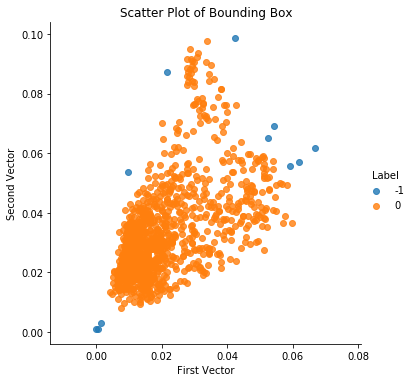

In [19]:
X_data, data_index = preprocess_scatterPlot(X_data)
countByCluster, X_data_dbscanClustered = get_dbscan_result(X_data)
scatterPlot(X_data, data_index, y_data=X_data_dbscanClustered["cluster"])
countByCluster

### Megaloptera

In [20]:
X_data = np.array(data_dic['Megaloptera'])
X_data.shape

(2, 2)

,cluster,clusterCount
0,-1,2


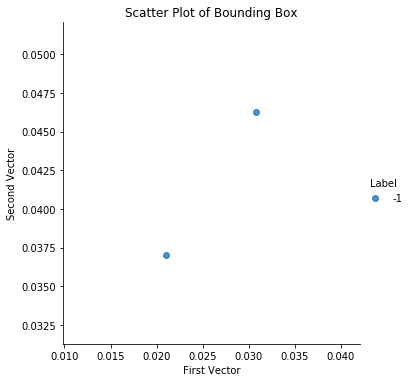

In [21]:
X_data, data_index = preprocess_scatterPlot(X_data)
countByCluster, X_data_dbscanClustered = get_dbscan_result(X_data)
scatterPlot(X_data, data_index, y_data=X_data_dbscanClustered["cluster"])
countByCluster

### Plecoptera

In [22]:
X_data = np.array(data_dic['Plecoptera'])
X_data.shape

(487, 2)

,cluster,clusterCount
0,0,464
1,-1,17
2,1,6


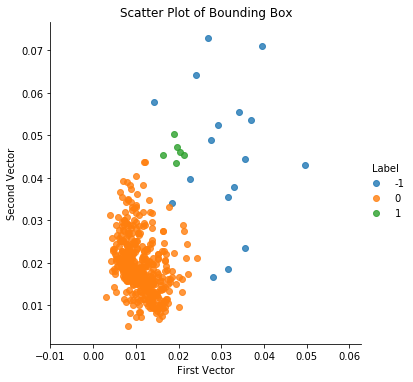

In [23]:
X_data, data_index = preprocess_scatterPlot(X_data)
countByCluster, X_data_dbscanClustered = get_dbscan_result(X_data)
scatterPlot(X_data, data_index, y_data=X_data_dbscanClustered["cluster"])
countByCluster

### Trichoptera

In [24]:
X_data = np.array(data_dic['Trichoptera'])
X_data.shape

(381, 2)

,cluster,clusterCount
0,0,374
1,-1,7


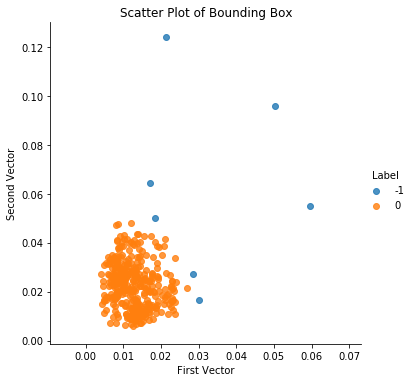

In [25]:
X_data, data_index = preprocess_scatterPlot(X_data)
countByCluster, X_data_dbscanClustered = get_dbscan_result(X_data)
scatterPlot(X_data, data_index, y_data=X_data_dbscanClustered["cluster"])
countByCluster

### Unknown

In [26]:
X_data = np.array(data_dic['Unknown'])
X_data.shape

(2775, 2)

,cluster,clusterCount
0,0,2772
1,-1,3


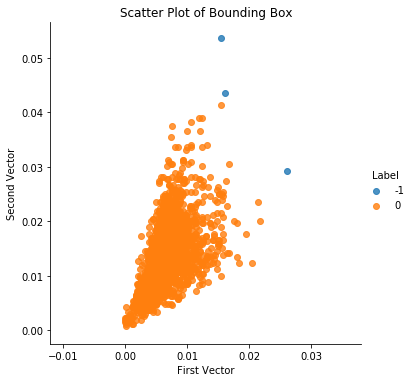

In [27]:
X_data, data_index = preprocess_scatterPlot(X_data)
countByCluster, X_data_dbscanClustered = get_dbscan_result(X_data)
scatterPlot(X_data, data_index, y_data=X_data_dbscanClustered["cluster"])
countByCluster